# Grupowanie metodą k-średnich

k-średnich jest metodą:

- partycjonującą (granice każdego skupienia są niezależne od pozostałych)
- na wyłączność (każdy element może należeć tylko do jednego skupienia)
- kompletną (każdy element w zbiorze danych musi być przypisany do przynajmniej jednego skupienia).

## Zadania

1.	Wczytaj plik `college.csv`, a następnie podejrzyj zawartość ramki danych. Zbiór zawiera informacje o 1270 szkołach wyższych i uniwersytetach w Stanach Zjednoczonych.

In [ ]:
#install.packages("tidyverse")
#install.packages("factoextra")

library(tidyverse)
library(factoextra)

In [ ]:
college <- read.csv("college.csv")
head(college)


,id,name,city,state,region,highest_degree,control,gender,admission_rate,sat_avg,undergrads,tuition,faculty_salary_avg,loan_default_rate,median_debt,lon,lat
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>
1,102669,Alaska Pacific University,Anchorage,AK,West,Graduate,Private,CoEd,0.4207,1054,275,19610,5804,0.077,23250.0,-149.90028,61.21806
2,101648,Marion Military Institute,Marion,AL,South,Associate,Public,CoEd,0.6139,1055,433,8778,5916,0.136,11500.0,-87.31917,32.63235
3,100830,Auburn University at Montgomery,Montgomery,AL,South,Graduate,Public,CoEd,0.8017,1009,4304,9080,7255,0.106,21335.0,-86.29997,32.36681
4,101879,University of North Alabama,Florence,AL,South,Graduate,Public,CoEd,0.6788,1029,5485,7412,7424,0.111,21500.0,-87.67725,34.79981
5,100858,Auburn University,Auburn,AL,South,Graduate,Public,CoEd,0.8347,1215,20514,10200,9487,0.045,21831.0,-85.48078,32.60986
6,100663,University of Alabama at Birmingham,Birmingham,AL,South,Graduate,Public,CoEd,0.8569,1107,11383,7510,9957,0.062,21941.5,-86.80249,33.52066


2. Utwórz nową ramkę danych, w której zamieścisz dane wyłącznie dla stanu Maryland (`state == MD`). Przekonwertuj nazwy każdej uczelni w etykiety wierszy (funkcja `column_to_rownames` - etykiety są potrzebne przy wizualizacji skupień). Następnie wyświetl statystyki podsumowujące dla cech `admission_rate` (odsetek przyjmowanych kandydatów) oraz `sat_avg` (średnia wyników egzaminów SAT).

In [ ]:
maryland_colleges <- college %>%
  filter(state == "MD") %>%
  column_to_rownames("name")

summary(maryland_colleges[, c("admission_rate", "sat_avg")])

 admission_rate      sat_avg    
 Min.   :0.1608   Min.   : 842  
 1st Qu.:0.5181   1st Qu.: 900  
 Median :0.5961   Median :1048  
 Mean   :0.5886   Mean   :1062  
 3rd Qu.:0.6606   3rd Qu.:1176  
 Max.   :0.8696   Max.   :1439  

3. Znormalizuj dane dla wybranych w punkcie 2 cech metodą z-score (funkcja scale()). Następnie dla nowo utworzonego zbioru wyświetl i przeanalizuj statystyki podsumowujące.

In [ ]:
maryland_normalized <- scale(maryland_colleges[, c("admission_rate", "sat_avg")])
summary(maryland_normalized)

 admission_rate        sat_avg       
 Min.   :-2.77601   Min.   :-1.2512  
 1st Qu.:-0.45725   1st Qu.:-0.9218  
 Median : 0.04895   Median :-0.0813  
 Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.46753   3rd Qu.: 0.6485  
 Max.   : 1.82387   Max.   : 2.1393  

4. Pogrupuj dane metodą k-średnich (funkcja `kmeans()`. Pierwszy argument: dane, drugi - `centers` - liczba skupień, argument `nstart` - liczba konfiguracji do wypróbowania). Ustaw wartości `centers` na 3, zaś `nstart` na 25.

In [ ]:
set.seed(123)
kmeans_result <- kmeans(maryland_normalized, centers = 3, nstart = 25)


5. Atrybut `size` funkcji `kmeans` reprezentuje liczbę obserwacji w każdej grupie, natomiast atrybut `centers` podaje współrzędne centroid każdego skupienia. Ile obserwacji znajduje się w każdej z trzech grup i jakie są współrzędne ich centroid?

In [ ]:
print("Liczebność grup:")
print(kmeans_result$size)
print("Współrzędne centroid:")
print(kmeans_result$centers)

[1] "Liczebność grup:"
[1] 8 2 9
[1] "Współrzędne centroid:"
  admission_rate    sat_avg
1      0.6608405  0.4894679
2     -1.7425275  1.7871932
3     -0.2001854 -0.8322366


6. Zwizualizuj skupienia za pomocą funkcji `fviz_cluster()` z pakietu `factoextra`. Funkcja przyjmuje argumenty: wynik grupowania, dane, które posłużyły do utworzenia grup oraz `repel`, który pomaga w zorganizowaniu układu etykiet elementów w wizualizacji. Opisz jakie różnice między skupieniami można zaobserwować na podstawie wykresu.

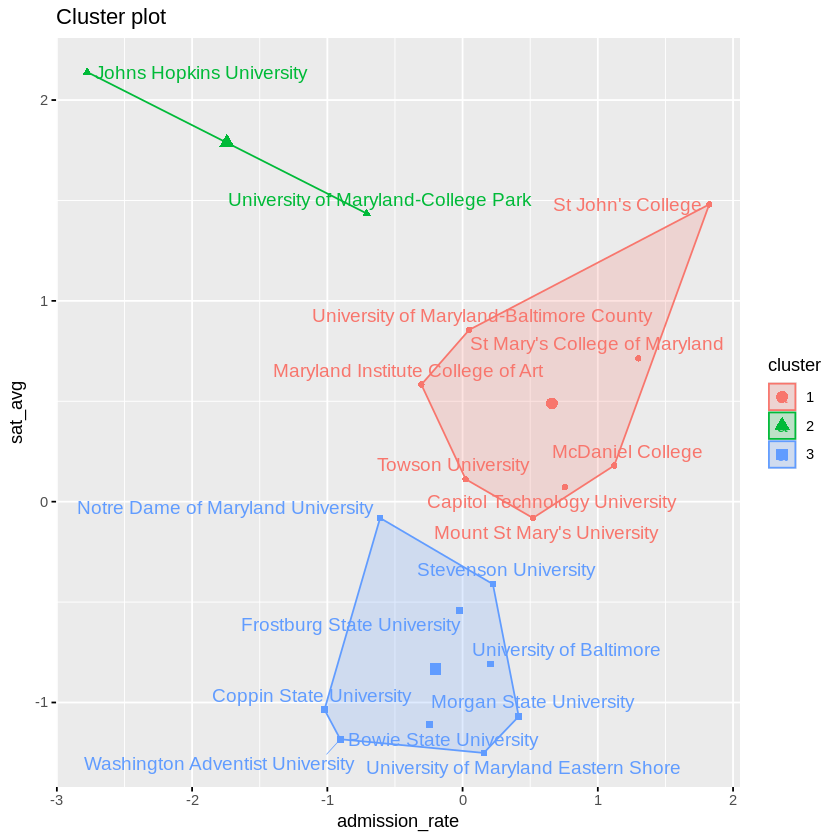

In [ ]:
fviz_cluster(kmeans_result, data = maryland_normalized, repel = TRUE)


7. Oceń różnice między skupieniami w zakresie pozostałych atrybutów: ilość osób na studiach licencjackich (`undergrads`), czesne (`tuition`), spłacalność kredytu studenckiego (`loan_default_rate`), pensje pracowników wydziału (`faculty_salary_avg`) czy mediana kredytu absolwentów (`median_debt`). W tym celu należy najpierw przypisać etykiety grup do obserwacji w zbiorze. Następnie wybiera się atrybuty do porównania, grupując je według skupień i generuje średnie wartości dla każdego z wybranych atrybutów.

In [ ]:
maryland_clusters <- maryland_colleges %>%
  mutate(cluster = as.factor(kmeans_result$cluster))

cluster_summary <- maryland_clusters %>%
  group_by(cluster) %>%
  summarise(
      avg_undergrads = mean(undergrads, na.rm = TRUE),
      avg_tuition = mean(tuition, na.rm = TRUE),
      avg_loan_default_rate = mean(loan_default_rate, na.rm = TRUE),
      avg_faculty_salary_avg = mean(faculty_salary_avg, na.rm = TRUE),
      avg_median_debt = mean(median_debt, na.rm = TRUE)
  )

  print("Średnie wartości atrybutów w klastrach:")
  print(cluster_summary)

Warning message:
“There were 3 warnings in `summarise()`.
The first warning was:
ℹ In argument: `avg_loan_default_rate = mean(loan_default_rate, na.rm = TRUE)`.
ℹ In group 1: `cluster = 1`.
Caused by warning in `mean.default()`:
! argument is not numeric or logical: returning NA
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings.”


[1] "Średnie wartości atrybutów w klastrach:"
# A tibble: 3 × 6
  cluster avg_undergrads avg_tuition avg_loan_default_rate
  <fct>            <dbl>       <dbl>                 <dbl>
1 1                4711.      27523.                    NA
2 2               16286.      28244.                    NA
3 3                3407       14219.                    NA
# ℹ 2 more variables: avg_faculty_salary_avg <dbl>, avg_median_debt <dbl>


### Wybieranie odpowiedniej liczby skupień.

Do określenia optymalnej liczby skupień można wykorzystać funkcję `fviz_nbclust()` z pakietu `factoextra`. Jako trzeci argument (po zbiorze danych i metodzie grupowania) podaje się metodę oceniania:

- `wss` -  na podstawie miary podobieństwa/ braku podobieństwa elementów w skupieniu WCSS (*Within Cluster Sum of Squares*) - suma kwadratów wewnątrz skupienia, czyli suma odległości między elementami w skupieniu i jego centroidą. Im mniejsza wartość WCSS, tym bardziej elementy w skupieniu są podobne do siebie. Wartość WCSS jest odwrotnie proporcjonalna do liczby `k`. Odpowiednią wartość `k` dobiera się na podstawie krzywej zależności liczby skupień od WCSS - jest to punkt zagięcia, poniżej którego dalszy wzrost `k` nie powoduje już istotnej zmiany WCSS (metoda "łokcia").

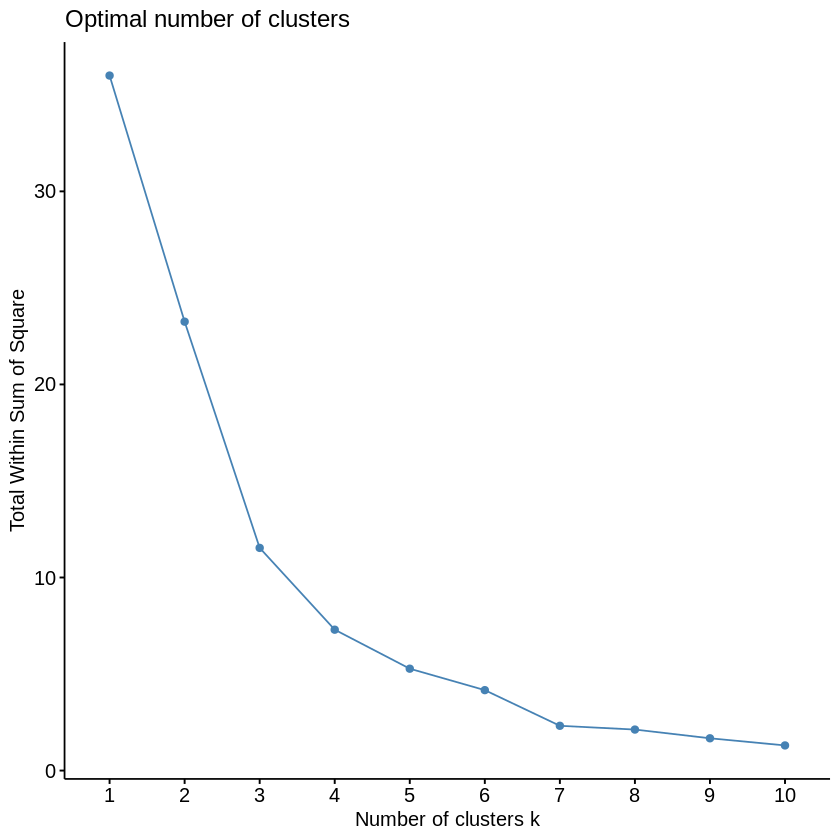

In [ ]:
fviz_nbclust(maryland_normalized, kmeans, method = "wss")

- `silhouette` - metoda średniego zarysu - zarys elementu mierzy, jak bardzo element pasuje do innych elementów w tym samym skupieniu i jak mało pasuje do elementów w sąsiednich. Wartość zarysu bliska `1` oznacza, że element znajduje się w odpowiednim skupieniu, wartość `-1` - że znajduje się w nieodpowiednim skupieniu. Jeśli większość elementów ma wysoką wartość, konfiguracja zostaje uznana za odpowiednią.

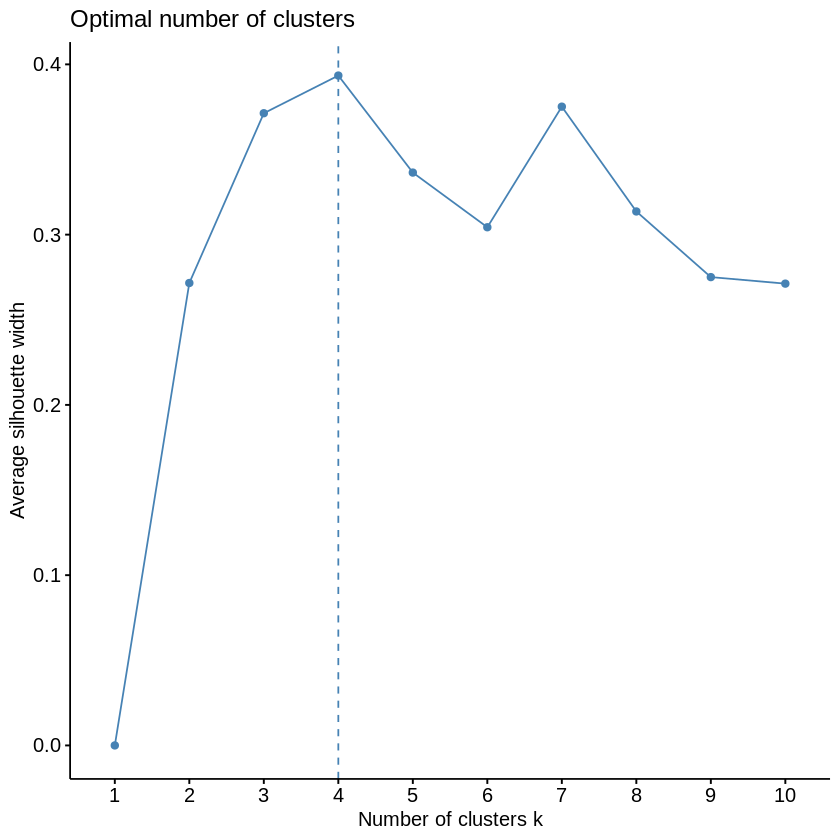

In [ ]:
fviz_nbclust(maryland_normalized, kmeans, method = "silhouette")

- `gap_stat` - statystyka odstępu - porównuje różnice między skupieniami tworzonymi na podstawie danych obserwacji i skupieniami tworzonymi z losowo generowanego zbioru danych, nazywanego referencyjnym zbiorem danych. Dla danej wartości *k* statystyka odstępu jest różnicą w całkowitych sumach WCSS danych obserwacji i referencyjnego zbioru danych. Optymalna liczba skupień jest oznaczona przez wartość *k*, która prowadzi do uzyskania najwyższej statystyki odstępu.

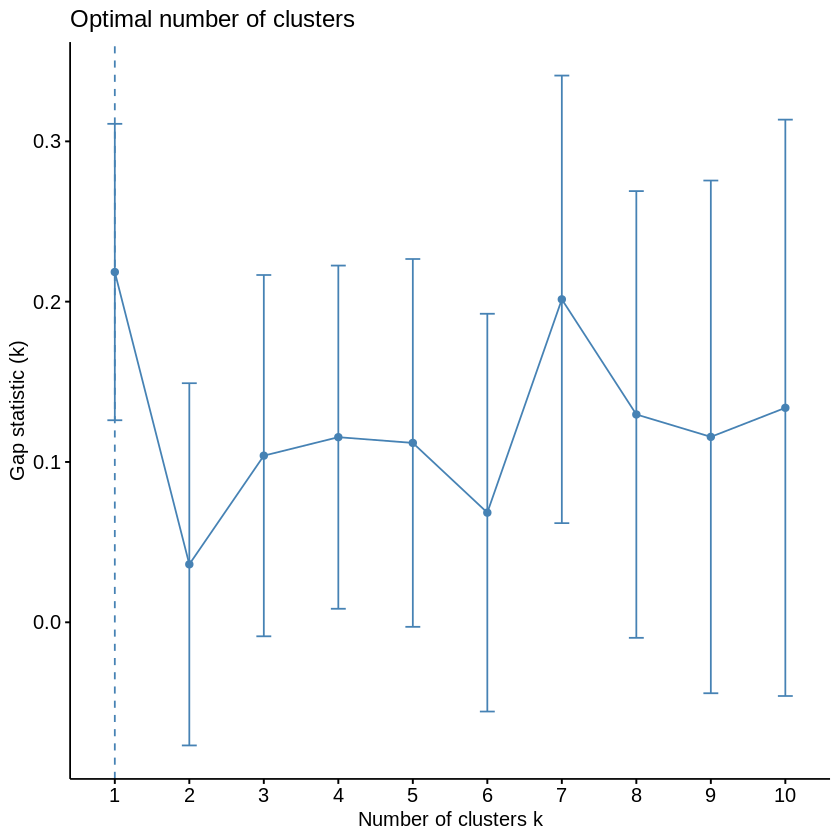

In [ ]:
fviz_nbclust(maryland_normalized, kmeans, method = "gap_stat")

8. Na podstawie wspomnianych metod dobierz odpowiednią liczbę skupień, a następnie przeprowadź i zwizualizuj grupowanie k-średnich dla wybranego *k*.

Warning message:
“There were 4 warnings in `summarise()`.
The first warning was:
ℹ In argument: `avg_loan_default_rate = mean(loan_default_rate, na.rm = TRUE)`.
ℹ In group 1: `cluster = 1`.
Caused by warning in `mean.default()`:
! argument is not numeric or logical: returning NA
ℹ Run `dplyr::last_dplyr_warnings()` to see the 3 remaining warnings.”


[1] "4-klastrowe rozwiązanie"
# A tibble: 4 × 7
  cluster     n avg_admission_rate avg_sat avg_undergrads avg_tuition
  <fct>   <int>              <dbl>   <dbl>          <dbl>       <dbl>
1 1           5              0.759   1146.          1192.      31763.
2 2           1              0.161   1439           6039       47060 
3 3           8              0.566    899.          3689.      11870.
4 4           5              0.541   1165.         11882.      20760.
# ℹ 1 more variable: avg_loan_default_rate <dbl>


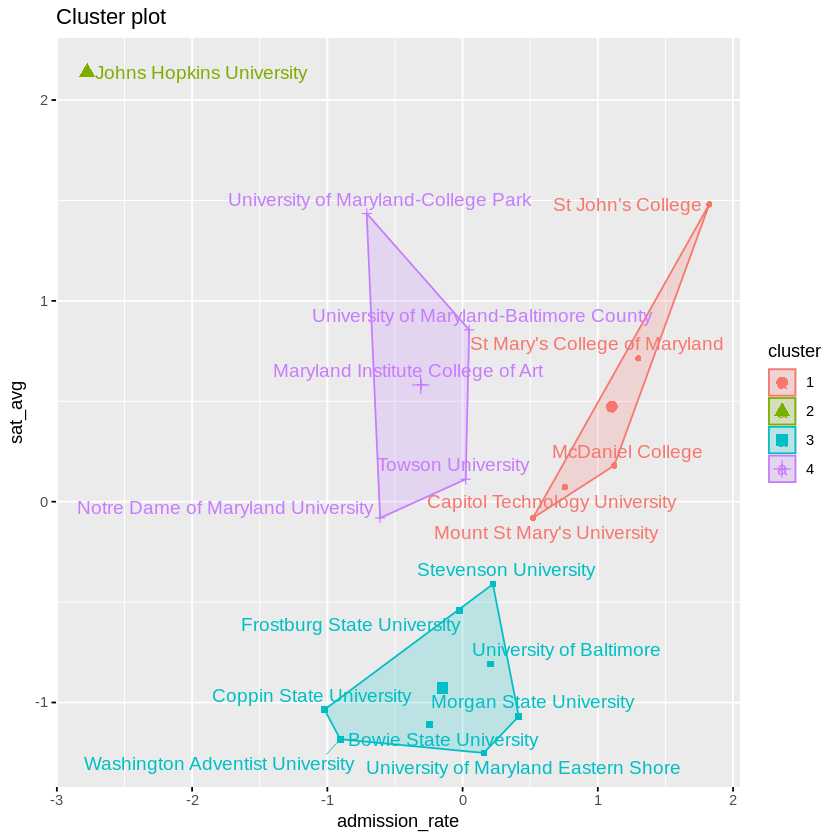

In [ ]:
set.seed(123)

kmeans_4 <- kmeans(maryland_normalized, centers = 4, nstart = 25)

fviz_cluster(kmeans_4, data = maryland_normalized, repel = TRUE)

maryland_4clusters <- maryland_colleges %>%
  mutate(cluster = as.factor(kmeans_4$cluster))

cluster_4_summary <- maryland_4clusters %>%
  group_by(cluster) %>%
  summarise(
      n = n(), #liczba collegów w klastrze
      avg_admission_rate = mean(admission_rate, na.rm = TRUE),
      avg_sat = mean(sat_avg, na.rm = TRUE),
      avg_undergrads = mean(undergrads, na.rm = TRUE),
      avg_tuition = mean(tuition, na.rm = TRUE),
      avg_loan_default_rate = mean(loan_default_rate, na.rm = TRUE),
  )

print("4-klastrowe rozwiązanie")
print(cluster_4_summary)